# Recommendation System

## Data Preprocessing:

In [3]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Replace 'your_dataset.csv' with the actual path or filename of your dataset
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\machine l\anime.csv")

# Display the first few rows to confirm it loaded correctly
print(df.head())


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [5]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Option 1: Drop rows with missing values (if data loss is acceptable)
df_cleaned = df.dropna()

# Option 2: Fill missing values with a specific value (e.g., 0 or column mean)
df_filled = df.fillna(0)  # Replace NaNs with 0

# Option 3: Fill missing values with the mean of each column
df_filled_mean = df.fillna(df.mean(numeric_only=True))

# Display the cleaned DataFrame to verify
print(df_filled.head())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  


In [7]:
# Get basic information about the dataset
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06


In [9]:
print(df.dtypes)

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


In [11]:
# Unique values in a particular column
print(df['type'].unique())

# Value counts for categorical columns
print(df['type'].value_counts())

['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]
type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64


In [13]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (12294, 7)


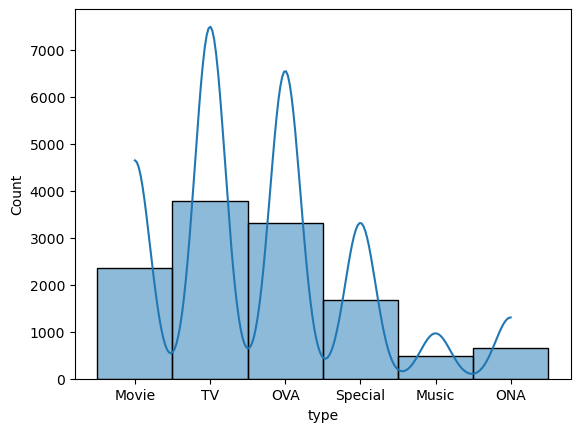

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plotting the distribution of a numeric column
sns.histplot(df['type'], kde=True)
plt.show()

In [27]:
# Remove string columns
data = df.select_dtypes(exclude=['object'])
data

,anime_id,rating,members
0,32281,9.37,200630
1,5114,9.26,793665
2,28977,9.25,114262
3,9253,9.17,673572
4,9969,9.16,151266
...,...,...,...
12289,9316,4.15,211
12290,5543,4.28,183
12291,5621,4.88,219
12292,6133,4.98,175


# Feature Extraction:

In [31]:
# Feature Extraction

# Convert genres into one-hot encoded format

encoder = OneHotEncoder()
genre_encoded = encoder.fit_transform(df[['genre']]).toarray()

In [39]:
#Prepare features DataFrame

features = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out())
features['rating'] = data['rating']

# Normalize numerical features

scaler = StandardScaler()
features[['rating']] = scaler.fit_transform(features[['rating']])


# Recommendation System:

In [21]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# 1. Create a sample dataset
data = {
    'Anime': ['Naruto', 'Attack on Titan', 'One Piece', 'Death Note', 'My Hero Academia'],
    'Genres': ['Action, Adventure', 'Action, Drama', 'Adventure, Comedy', 'Drama, Mystery', 'Action, Comedy'],
    'User Rating': [8.3, 9.1, 8.9, 9.0, 8.5],
    'Episodes': [500, 75, 1000, 37, 88]
}

df = pd.DataFrame(data)

# Display the dataset
print("Initial Dataset:")
print(df)

# 2. Convert the 'Genres' column into lists
df['Genres'] = df['Genres'].apply(lambda x: x.split(', '))

# 3. One-hot encode the genres using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['Genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)
# 4. Normalize the numerical features
scaler = StandardScaler()
df[['User Rating', 'Episodes']] = scaler.fit_transform(df[['User Rating', 'Episodes']])

# 5. Concatenate the encoded genres with normalized numerical features
df_final = pd.concat([df, genres_df], axis=1).drop(['Genres', 'Anime'], axis=1)

print("\nFeature Matrix:")
print(df_final)

# 6. Compute the cosine similarity matrix
cosine_sim = cosine_similarity(df_final)

print("\nCosine Similarity Matrix:")
print(cosine_sim)


Initial Dataset:
              Anime             Genres  User Rating  Episodes
0            Naruto  Action, Adventure          8.3       500
1   Attack on Titan      Action, Drama          9.1        75
2         One Piece  Adventure, Comedy          8.9      1000
3        Death Note     Drama, Mystery          9.0        37
4  My Hero Academia     Action, Comedy          8.5        88

Feature Matrix:
   User Rating  Episodes  Action  Adventure  Comedy  Drama  Mystery
0    -1.497172  0.431727       1          1       0      0        0
1     1.106606 -0.715048       1          0       0      1        0
2     0.455661  1.780875       0          1       1      0        0
3     0.781133 -0.817583       0          0       0      1        1
4    -0.846228 -0.679970       1          0       1      0        0

Cosine Similarity Matrix:
[[ 1.         -0.23738336  0.22265533 -0.39957894  0.52602248]
 [-0.23738336  1.         -0.17158221  0.69976325  0.15954288]
 [ 0.22265533 -0.17158221  1.    

In [23]:
def recommend_anime(anime_name, df, cosine_sim_matrix, threshold=0.5):
    """
    Recommends anime based on cosine similarity.
    
    Parameters:
    - anime_name: Name of the target anime
    - df: Original DataFrame containing the anime data
    - cosine_sim_matrix: Precomputed cosine similarity matrix
    - threshold: Minimum similarity score for recommendations
    
    Returns:
    - List of recommended anime with similarity scores
    """
    if anime_name not in df['Anime'].values:
        return f"Anime '{anime_name}' not found in the dataset."

    # Get the index of the target anime
    idx = df[df['Anime'] == anime_name].index[0]

    # Get similarity scores for the target anime
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))

    # Sort anime by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Filter anime with similarity scores above the threshold (excluding the target anime itself)
    sim_scores = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]

    # Prepare the recommendation list
    recommendations = [(df['Anime'].iloc[i], round(score, 2)) for i, score in sim_scores]

    if recommendations:
        return recommendations
    else:
        return f"No recommendations found for '{anime_name}' with the given threshold."

# 7. Test the recommendation function
target_anime = 'Naruto'
threshold_value = 0.5

recommendations = recommend_anime(target_anime, df, cosine_sim, threshold=threshold_value)
print(f"\nRecommendations for '{target_anime}' (Threshold = {threshold_value}):")
print(recommendations)



Recommendations for 'Naruto' (Threshold = 0.5):
[('My Hero Academia', 0.53)]


# Evaluation:

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score

# Sample user-anime rating dataset
data = {
    'User': ['U1', 'U1', 'U2', 'U2', 'U3', 'U3', 'U4', 'U4', 'U5', 'U5'],
    'Anime': ['Naruto', 'Attack on Titan', 'Naruto', 'One Piece', 
              'Death Note', 'My Hero Academia', 'Naruto', 'One Piece',
              'Death Note', 'Attack on Titan'],
    'Rating': [5, 4, 5, 3, 5, 4, 2, 4, 4, 5]
}

df = pd.DataFrame(data)

# Pivot the data to create a user-anime matrix
user_anime_matrix = df.pivot_table(index='User', columns='Anime', values='Rating').fillna(0)

print("User-Anime Matrix:")
print(user_anime_matrix)


User-Anime Matrix:
Anime  Attack on Titan  Death Note  My Hero Academia  Naruto  One Piece
User                                                                   
U1                 4.0         0.0               0.0     5.0        0.0
U2                 0.0         0.0               0.0     5.0        3.0
U3                 0.0         5.0               4.0     0.0        0.0
U4                 0.0         0.0               0.0     2.0        4.0
U5                 5.0         4.0               0.0     0.0        0.0


In [28]:
# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Create pivot tables for the train and test sets
train_matrix = train.pivot_table(index='User', columns='Anime', values='Rating').fillna(0)
test_matrix = test.pivot_table(index='User', columns='Anime', values='Rating').fillna(0)

print("\nTraining Matrix:")
print(train_matrix)

print("\nTesting Matrix:")
print(test_matrix)



Training Matrix:
Anime  Attack on Titan  Death Note  My Hero Academia  Naruto  One Piece
User                                                                   
U1                 0.0         0.0               0.0     5.0        0.0
U2                 0.0         0.0               0.0     5.0        3.0
U3                 0.0         5.0               4.0     0.0        0.0
U4                 0.0         0.0               0.0     2.0        4.0
U5                 5.0         0.0               0.0     0.0        0.0

Testing Matrix:
Anime  Attack on Titan  Death Note
User                              
U1                 4.0         0.0
U5                 0.0         4.0


In [30]:
# Compute cosine similarity between users based on the training matrix
user_similarity = cosine_similarity(train_matrix)
user_sim_df = pd.DataFrame(user_similarity, index=train_matrix.index, columns=train_matrix.index)

print("\nUser Similarity Matrix:")
print(user_sim_df)

# Function to recommend anime based on user similarity
def recommend_anime(user, train_matrix, user_sim_df, top_n=3):
    """
    Recommend top N anime for a given user based on user similarity.

    Parameters:
    - user: Target user for recommendations
    - train_matrix: User-anime training matrix
    - user_sim_df: User similarity matrix
    - top_n: Number of recommendations to make

    Returns:
    - List of recommended anime
    """
    # Find similar users
    similar_users = user_sim_df[user].sort_values(ascending=False).index[1:]

    # Aggregate ratings from similar users
    user_ratings = train_matrix.loc[similar_users].mean(axis=0)

    # Filter out anime the user has already rated
    rated_anime = train_matrix.loc[user][train_matrix.loc[user] > 0].index
    recommendations = user_ratings.drop(rated_anime).sort_values(ascending=False).head(top_n)

    return recommendations.index.tolist()

# Example recommendation for user 'U1'
print("\nRecommendations for U1:")
print(recommend_anime('U1', train_matrix, user_sim_df))



User Similarity Matrix:
User        U1        U2   U3        U4   U5
User                                        
U1    1.000000  0.857493  0.0  0.447214  0.0
U2    0.857493  1.000000  0.0  0.843661  0.0
U3    0.000000  0.000000  1.0  0.000000  0.0
U4    0.447214  0.843661  0.0  1.000000  0.0
U5    0.000000  0.000000  0.0  0.000000  1.0

Recommendations for U1:
['One Piece', 'Attack on Titan', 'Death Note']


In [32]:
# Function to evaluate the recommendation system
def evaluate_recommendations(train_matrix, test_matrix, user_sim_df, top_n=3):
    precisions, recalls, f1_scores = [], [], []

    for user in test_matrix.index:
        # Generate recommendations
        recommendations = recommend_anime(user, train_matrix, user_sim_df, top_n=top_n)

        # Get the actual anime the user has rated in the test set
        actual_anime = test_matrix.loc[user][test_matrix.loc[user] > 0].index.tolist()

        # Calculate True Positives (TP), False Positives (FP), and False Negatives (FN)
        TP = len(set(recommendations) & set(actual_anime))
        FP = len(set(recommendations) - set(actual_anime))
        FN = len(set(actual_anime) - set(recommendations))

        # Compute precision, recall, and F1-score
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Calculate average precision, recall, and F1-score
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)

    return avg_precision, avg_recall, avg_f1

# Evaluate the recommendation system
precision, recall, f1 = evaluate_recommendations(train_matrix, test_matrix, user_sim_df, top_n=3)

print(f"\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Evaluation Metrics:
Precision: 0.33
Recall: 1.00
F1-Score: 0.50


## Interview Questions:

# 1 . Can you explain the difference between user-based and item-based collaborative filtering?

User-based collaborative filtering and item-based collaborative filtering are two popular approaches for generating recommendations. Both rely on the idea that similar entities (users or items) will behave similarly. However, they differ in how they compute similarity and generate recommendations. Let’s break down the key differences between the two.

1. User-Based Collaborative Filtering
  ** User-based filtering identifies similar users and recommends items that these similar users have liked or interacted with.

Process:
 
1 Compute Similarity Between Users:

 *Based on user behavior (e.g., ratings, clicks, or purchases).
 *Similarity metrics: Cosine similarity, Pearson correlation, or Jaccard similarity.

2 Generate Recommendations:

 * For a given user, find other users with similar tastes.
* Recommend items these similar users have interacted with but the target user hasn’t.

     
Example:
  *If Alice likes Naruto and One Piece, and Bob (a similar user) likes Naruto and Attack on Titan, Alice will be recommended Attack on Titan.

Pros:

* Works well for communities with many users sharing similar preferences.
* Useful when items have few interactions but users are highly active.

Cons:

*Cold-start problem: If a new user has no interactions, recommendations are difficult.
*Doesn’t scale well with large datasets (too many users).

2. Item-Based Collaborative Filtering
  * Item-based filtering identifies similar items and recommends items that are related to what the user has already interacted with.

Process:

1 Compute Similarity Between Items:

 * Based on user interaction patterns (e.g., users who rated item A highly tend to also rate item B highly).
 * Similarity metrics: Cosine similarity or Adjusted cosine similarity.

2 Generate Recommendations:

  * For a given user, recommend items similar to those the user has already interacted with.

Example:
*If Alice watches Naruto, and other users who watched Naruto also watched Attack on Titan, Alice will be recommended Attack on Titan.

Pros:

* Scales better than user-based filtering (fewer items than users in many cases).

* Works well for large, sparse datasets (e.g., movie or product recommendations).


Cons:

* Cold-start problem: If an item is new, it won’t have enough interactions to compute similarity.

* May not account for changing user preferences as effectively as user-based filtering.


# 2. What is collaborative filtering, and how does it work?

Collaborative Filtering Overview
 * Collaborative filtering (CF) is a popular technique used in recommendation systems to suggest items (e.g., movies, products, music) to users based on their preferences or interactions. The core idea is that people with similar tastes will like similar things. CF leverages historical interactions like ratings, clicks, or purchases to identify patterns among users or items.

How Collaborative Filtering Works
 * Collaborative filtering works by analyzing the relationships between users and items in a dataset. It tries to predict the interest of a user in a specific item by looking at either:

 * Similar users' preferences (User-based CF)
  * Similar items that the user interacted with (Item-based CF)

There are two primary types of collaborative filtering:

1 User-Based Collaborative Filtering
2 Item-Based Collaborative Filtering

1. User-Based Collaborative Filtering
* In user-based CF, the goal is to find users with similar behavior or preferences and recommend items they have interacted with but the target user hasn’t.

Example:

* User A and User B both gave high ratings to Naruto and One Piece.
* If User A also likes Attack on Titan, the system will recommend Attack on Titan to User B since they have similar preferences.
Steps:
1 Find similar users to the target user using a similarity metric like cosine similarity or Pearson correlation.
2 Aggregate ratings or interactions from those similar users.
3 Recommend items that these similar users have interacted with but the target user hasn’t.

Challenges:
1 Cold start problem: Hard to recommend for new users.
2 Scalability issue: Finding similar users can be computationally expensive for large datasets.
2. Item-Based Collaborative Filtering
  * In item-based CF, the goal is to find items that are similar to those the target user has already interacted with and recommend them.

Example:
 * If a user watches Naruto and One Piece, and Attack on Titan is highly similar to these, the system will recommend Attack on Titan.

Steps:

1 Compute similarity between items based on user ratings or interactions.
2 For each item the user has interacted with, find similar items.
3 Aggregate these similar items to generate a recommendation list.

Challenges:

* Cold start for new items: Hard to recommend items that have few interactions.
* May over-recommend popular items, ignoring less-known but relevant ones.

Similarity Measures in Collaborative Filtering
            
* Cosine Similarity: Measures the cosine of the angle between two vectors (e.g., user or item rating vectors).

Cosine Similarity(A,B)=A.B/
​
 
Pearson Correlation: Measures the linear relationship between two users or items.

Jaccard Similarity: Measures the similarity between two sets (e.g., items bought by two users).

Types of Data in Collaborative Filtering
Explicit Feedback: Users give direct ratings (e.g., 5-star ratings for movies).
Implicit Feedback: Indirect signals like clicks, views, or purchases.
Advantages of Collaborative Filtering
Doesn’t need domain-specific knowledge: Relies only on user interactions or behavior.
Automatically adapts to changing preferences: As new data comes in, the system updates recommendations.
Challenges of Collaborative Filtering
Cold Start Problem:

New Users: The system lacks enough data to recommend items.
New Items: Items with few interactions aren’t recommended.
Data Sparsity:

Many users only interact with a small subset of items, resulting in sparse matrices.
Scalability:

Computing similarity for a large number of users or items can be computationally expensive.
Applications of Collaborative Filtering
Streaming Platforms: Netflix or Spotify recommend shows or songs based on user preferences.
E-commerce: Amazon suggests products based on purchase history or viewing behavior.
Social Media: Facebook recommends friends based on mutual connections.
Collaborative Filtering vs. Content-Based Filtering
Feature	Collaborative Filtering	Content-Based Filtering
Source of Information	User interactions (ratings, purchases)	Item features (genres, keywords)
Strength	Learns from other users' behavior	Doesn’t require large user interactions
Cold-Start Issue	Struggles with new users or items	Struggles with insufficient item features
Example	"Users like you also liked.